### Import PSSR Checklist PDF, it will be broken up Page by Page and Pages will become images

In [1]:

from pikepdf import Pdf, PdfImage               #to install, run: 'pip install pikepdf' in cmd terminal
import os


#converting Pdf to individual image files
#------------------------------------------
filename = "Pinestraw107H.pdf"
file = Pdf.open(filename)


for i, page in enumerate(file.pages):
    
    for j, (name, raw_image) in enumerate(page.images.items()):
        image = PdfImage(raw_image)
        out = image.extract_to(fileprefix=f"{filename}-page{i:03}-img{j:03}")
        print('image created in '+str(os.getcwd())+'\\'+ str(out))
        
print(str(i+1)+' PDF pages detected \n')

#--------------------------------------------------------------------------------------

image created in C:\Users\admin1\Desktop\resources\Python\Ameredev\Pinestraw107H.pdf-page000-img000.jpg
image created in C:\Users\admin1\Desktop\resources\Python\Ameredev\Pinestraw107H.pdf-page001-img000.jpg
image created in C:\Users\admin1\Desktop\resources\Python\Ameredev\Pinestraw107H.pdf-page002-img000.jpg
image created in C:\Users\admin1\Desktop\resources\Python\Ameredev\Pinestraw107H.pdf-page003-img000.jpg
image created in C:\Users\admin1\Desktop\resources\Python\Ameredev\Pinestraw107H.pdf-page004-img000.jpg
5 PDF pages detected 



### Scan for each Cell in an Image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'

In [3]:
# Read the image
img = cv2.imread("Pinestraw107H.pdf-page000-img000.jpg", 0)

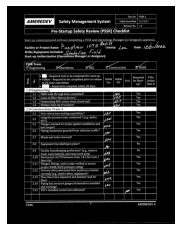

In [4]:
 # Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
cv2.imwrite("Images/Image_bin.jpg",img_bin)
plt.axis('off')
plt.imshow(img_bin)

In [5]:
def f(x):
    # Defining a kernel length
    global horizontal_lines_img, verticle_lines_img, kernel
    kernel_length = np.array(img).shape[1]//x

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("Images/verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    plt.subplot(1, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
    plt.imshow(verticle_lines_img);
    plt.axis('off')

    plt.subplot(1, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
    plt.imshow(horizontal_lines_img);
    plt.axis('off')

interact(f,  x=widgets.IntSlider(min=1,max=255,step=1,value=50))

interactive(children=(IntSlider(value=50, description='x', max=255, min=1), Output()), _dom_classes=('widget-i…

<function __main__.f(x)>

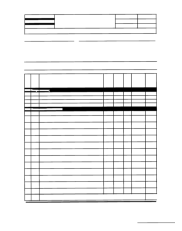

In [6]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_final_bin)

In [7]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

<ipython-input-8-809b62877727>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(8, 2), dpi=80)


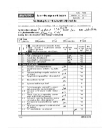

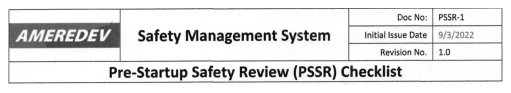

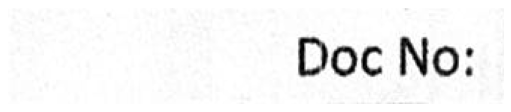

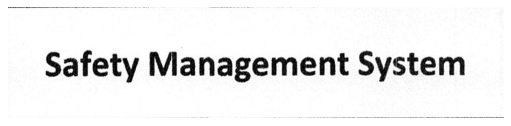

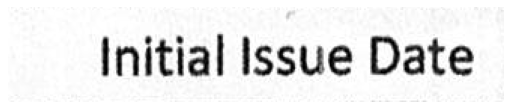

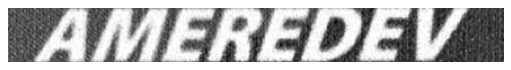

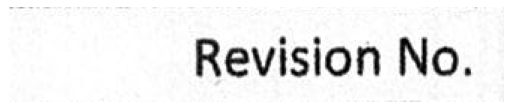

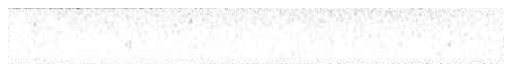

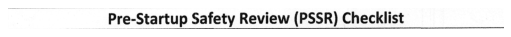

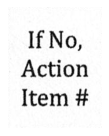

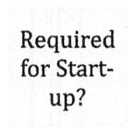

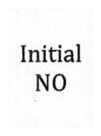

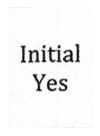

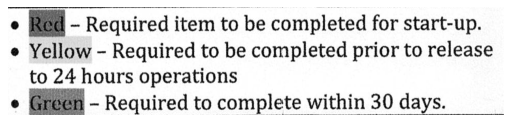

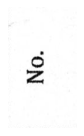

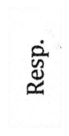

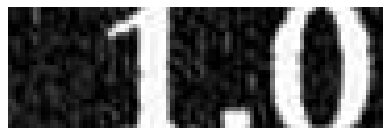

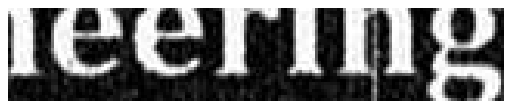

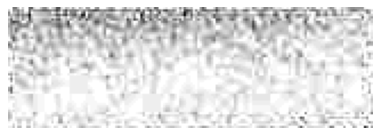

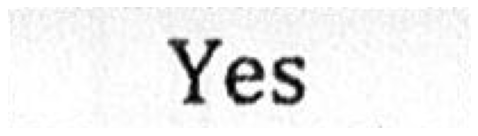

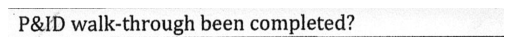

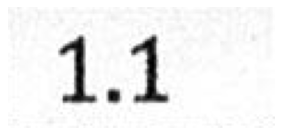

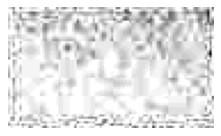

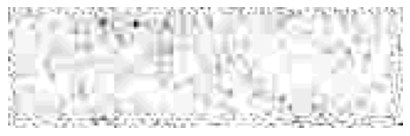

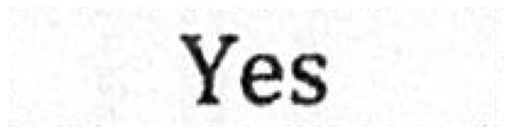

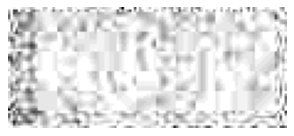

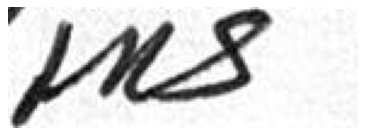

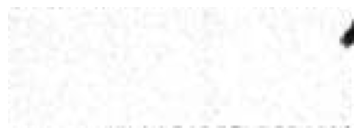

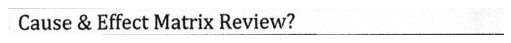

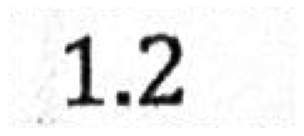

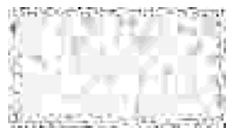

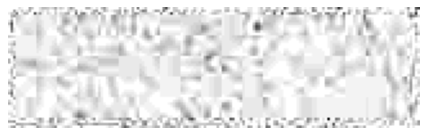

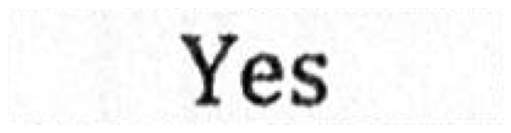

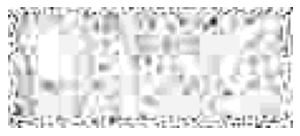

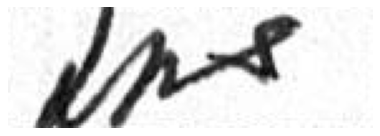

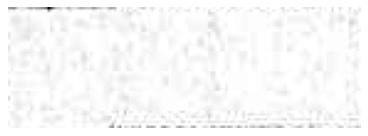

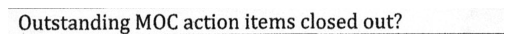

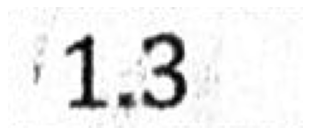

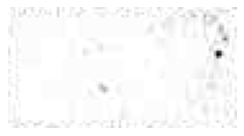

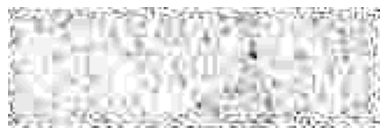

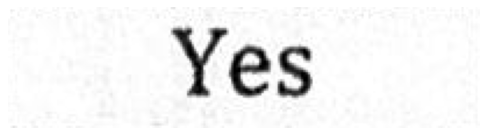

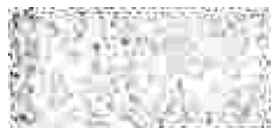

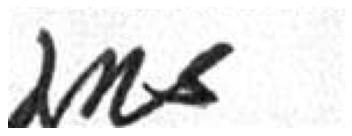

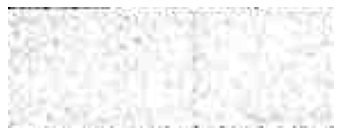

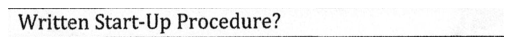

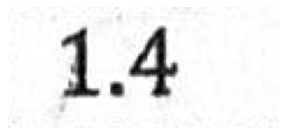

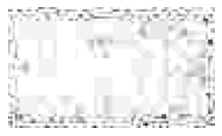

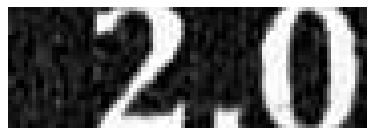

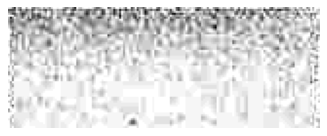

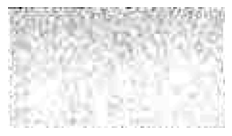

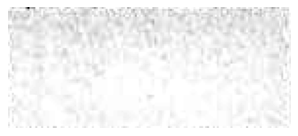

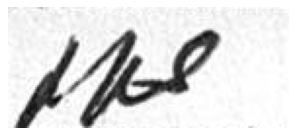

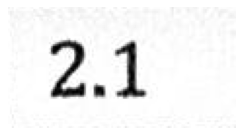

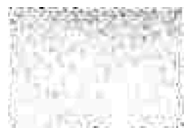

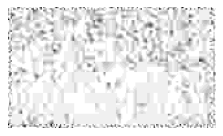

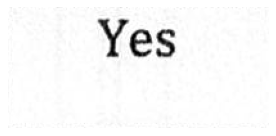

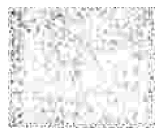

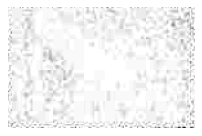

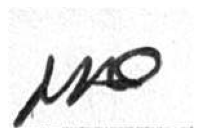

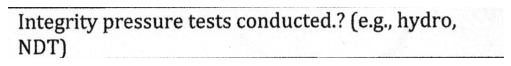

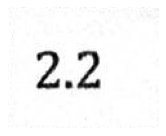

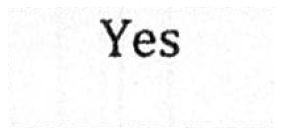

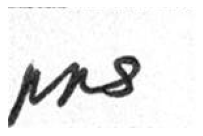

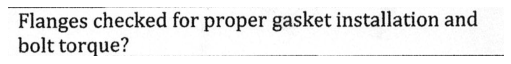

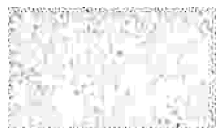

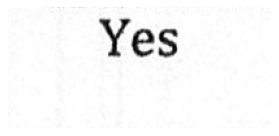

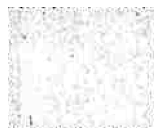

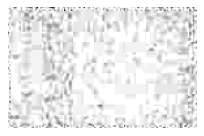

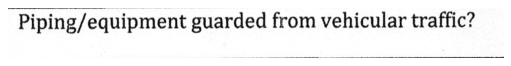

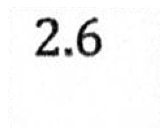

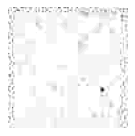

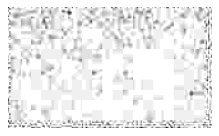

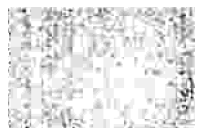

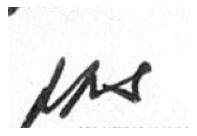

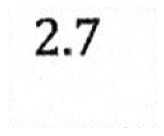

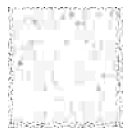

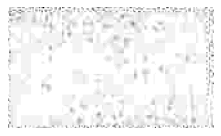

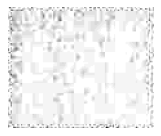

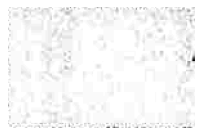

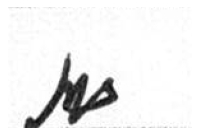

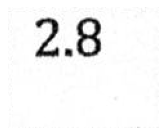

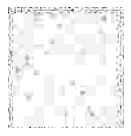

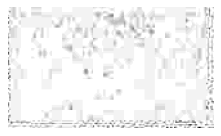

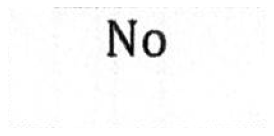

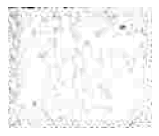

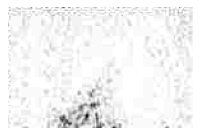

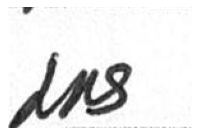

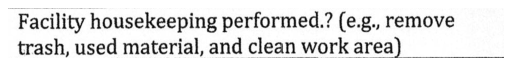

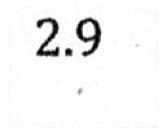

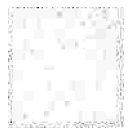

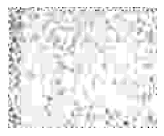

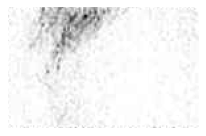

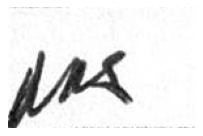

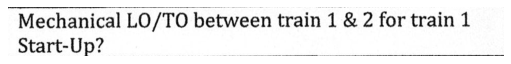

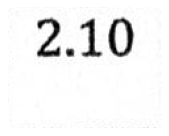

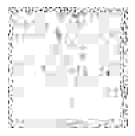

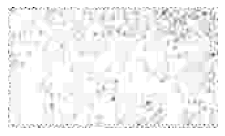

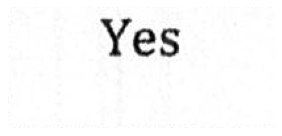

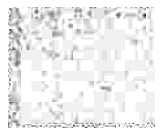

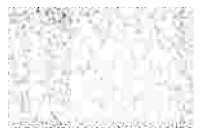

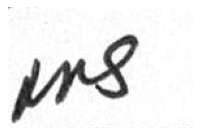

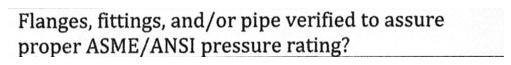

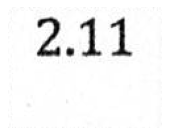

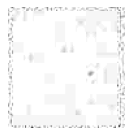

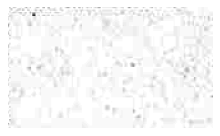

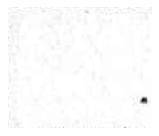

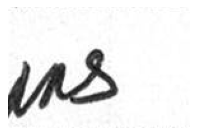

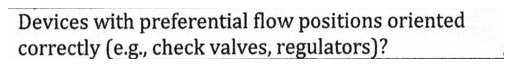

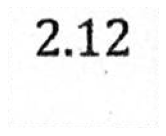

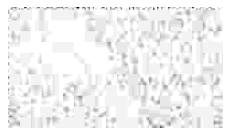

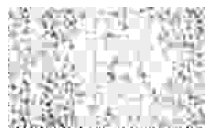

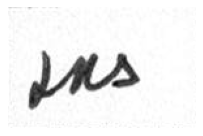

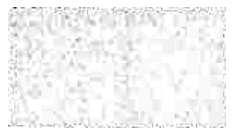

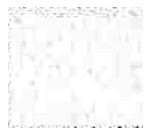

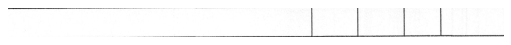

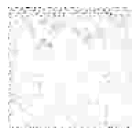

In [8]:
from matplotlib.pyplot import figure

idx = 0
Xs= []
Ys= []
Ws= []
Hs=[]
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    Xs.append(x)
    Ys.append(y)
    Ws.append(w)
    Hs.append(h)
# print(Xs)
# print(Ys)
# print(Ws)
# print(Hs)

count=0

for i in range(0,len(Xs)):
    
    new_img = img[Ys[i]:Ys[i]+Hs[i], Xs[i]:Xs[i]+Ws[i]]
    count+=1
    
    figure(figsize=(8, 2), dpi=80)
    plt.imshow(new_img)
    plt.axis('off')

    #print(count)
    plt.savefig(str(os.getcwd())+'\\CellImages\\'+str(count)+'.png')


In [75]:
#install Teseract for Windows here: https://github.com/UB-Mannheim/tesseract/wiki
#make sure tesseract is installed under defualt location of: 'C:\Users\USER\AppData\Local\Tesseract-OCR'

import pytesseract                                    #to install, run: 'pip install pytesseract' in cmd terminal
import cv2                                            #to install, run: 'pip install opencv-python' in cmd terminal
import numpy
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'

#converting image files to Numpy arrays
#-------------------------------------------

pages = {'Page 1':{1.1:['Initial Yes','Initial No','NA'],1.2:['Initial Yes','Initial No','NA'],
                   1.3:['Initial Yes','Initial No','NA'],1.4:['Initial Yes','Initial No','NA'],
                   2.1:['Initial Yes','Initial No','NA'],2.2:['Initial Yes','Initial No','NA'],
                   2.5:['Initial Yes','Initial No','NA'],2.6:['Initial Yes','Initial No','NA'],
                   2.7:['Initial Yes','Initial No','NA'],2.8:['Initial Yes','Initial No','NA'],
                   2.9:['Initial Yes','Initial No','NA'],2.10:['Initial Yes','Initial No','NA'],
                   2.11:['Initial Yes','Initial No','NA'],2.12:['Initial Yes','Initial No','NA'],
                   2.13:['Initial Yes','Initial No','NA'],2.14:['Initial Yes','Initial No','NA'],
                   2.15:['Initial Yes','Initial No','NA']},
        
         
        'Page 2':{3.1:['Initial Yes','Initial No','NA'],3.2:['Initial Yes','Initial No','NA'],
                  3.3:['Initial Yes','Initial No','NA'],3.4:['Initial Yes','Initial No','NA'],
                  3.5:['Initial Yes','Initial No','NA'],3.6:['Initial Yes','Initial No','NA'],
                  3.7:['Initial Yes','Initial No','NA'],3.8:['Initial Yes','Initial No','NA'],
                  3.9:['Initial Yes','Initial No','NA'],3.10:['Initial Yes','Initial No','NA'],
                  3.11:['Initial Yes','Initial No','NA'],3.12:['Initial Yes','Initial No','NA'],
                  3.13:['Initial Yes','Initial No','NA'],3.14:['Initial Yes','Initial No','NA'],
                  3.15:['Initial Yes','Initial No','NA'],3.16:['Initial Yes','Initial No','NA'],
                  3.17:['Initial Yes','Initial No','NA']},
         
        'Page 3':{4.1:['Initial Yes','Initial No','NA'],4.2:['Initial Yes','Initial No','NA'],
                  4.3:['Initial Yes','Initial No','NA'],4.4:['Initial Yes','Initial No','NA'],
                  4.5:['Initial Yes','Initial No','NA'],5.1:['Initial Yes','Initial No','NA'],
                  5.2:['Initial Yes','Initial No','NA'],5.3:['Initial Yes','Initial No','NA'],
                  5.4:['Initial Yes','Initial No','NA'],5.5:['Initial Yes','Initial No','NA'],
                  6.1:['Initial Yes','Initial No','NA'],6.2:['Initial Yes','Initial No','NA'],
                  6.3:['Initial Yes','Initial No','NA'],6.4:['Initial Yes','Initial No','NA'],
                  6.5:['Initial Yes','Initial No','NA'],6.6:['Initial Yes','Initial No','NA'],
                  6.7:['Initial Yes','Initial No','NA']}
        }

print(pages['Page 1'][1.3])


path = str(os.getcwd())+'\\CellImages'              # pull in all images from CellImages folder, sorted as they were loaded
main_folder = os.listdir(path)                      # main_folder is a list of image files in CellImages

for i in range(0,len(main_folder)):
    main_folder[i] = main_folder[i].strip('.png')
main_folder = [int(x) for x in main_folder]
main_folder.sort()
for i in range(0,len(main_folder)):
    main_folder[i] = str(main_folder[i])+'.png'

    #############################################################
from PIL import Image
  
hit = 0    
for i in range(0,len(main_folder)):                       #read every image in CellImages 1by1, then print interpreted text
    img = cv2.imread(os.getcwd()+'\\CellImages'+'\\'+main_folder[i])
#     print(img.shape)
#     width = img.shape[0]
#     height = img.shape[1]
#     print(width)
#     print(height)

    img = cv2.resize(img, (600, 360))  
    
#     print(pytesseract.image_to_boxes(img))               #Tesseract is a string of box locations: x,y,width,height 
                                                        #program draws a box around each deteted character 
                                                        #and adds them as the first item for each box in the tesseract list                              
    #print('Loaded image '+str(i+1)).............

    hImg, wImg, _ = img.shape
    boxes = pytesseract.image_to_boxes(img)
    output = ''


    for b in boxes.splitlines():
        b = b.split(' ')
        output +=b[0]
#         print(b) 
        if output == 'Yes':
            hit+=1
            if hit == 1:
                StartPoint = i
                print('Start Point***************: '+str(StartPoint))
            else:
                a=2
                
        if i == StartPoint+1:
            pages['Page 1'][1.1][2] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.1][2]))          
        if i == StartPoint+2:
            pages['Page 1'][1.1][1] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.1][1]))          
        if i == StartPoint+3:
            pages['Page 1'][1.1][0] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.1][0]))         
        if i == StartPoint+9:
            pages['Page 1'][1.2][2] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.2][2]))
        if i == StartPoint+10:
            pages['Page 1'][1.2][1] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.2][1]))
        if i == StartPoint+11:
            pages['Page 1'][1.2][0] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.2][0]))
        if i == StartPoint+17:
            pages['Page 1'][1.3][2] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.3][2]))
        if i == StartPoint+18:
            pages['Page 1'][1.3][1] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.3][1]))
        if i == StartPoint+19:
            pages['Page 1'][1.3][0] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.3][0]))
        if i == StartPoint+25:
            pages['Page 1'][1.4][2] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.4][2]))
        if i == StartPoint+26:
            pages['Page 1'][1.4][1] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.4][1]))
        if i == StartPoint+27:
            pages['Page 1'][1.4][0] = output
            print(str(i) + ' output: '+str(pages['Page 1'][1.4][0]))
            
        
                

#     print(i)
#     print(type(output))

#    print(output)             #output is the interpreted text from each image
         
print(pages['Page 1'])   


['Initial Yes', 'Initial No', 'NA']
Start Point***************: 30
31 output: ~
33 output: ~
39 output: A
39 output: Ay
47 output: r
47 output: ra
47 output: rap
47 output: rapL
47 output: rapLe
47 output: rapLeU
47 output: rapLeUy
49 output: G
49 output: Gi
49 output: Gis
49 output: Gist
49 output: Gisti
49 output: Gistie
49 output: Gistiei
49 output: Gistiei.
49 output: Gistiei.4
49 output: Gistiei.4a
49 output: Gistiei.4aa
49 output: Gistiei.4aai
49 output: Gistiei.4aaia
49 output: Gistiei.4aaia‘
49 output: Gistiei.4aaia‘i
49 output: Gistiei.4aaia‘iM
49 output: Gistiei.4aaia‘iMy
49 output: Gistiei.4aaia‘iMyi
49 output: Gistiei.4aaia‘iMyid
49 output: Gistiei.4aaia‘iMyido
49 output: Gistiei.4aaia‘iMyidol
49 output: Gistiei.4aaia‘iMyidols
55 output: ~
57 output: ~
{1.1: ['~', 'Initial No', '~'], 1.2: ['Initial Yes', 'Initial No', 'Ay'], 1.3: ['Gistiei.4aaia‘iMyidols', 'Initial No', 'rapLeUy'], 1.4: ['~', 'Initial No', '~'], 2.1: ['Initial Yes', 'Initial No', 'NA'], 2.2: ['Initial Yes',

In [64]:
print(' ')